<a href="https://colab.research.google.com/github/kemalbayram61/Bulan-kMant-k/blob/main/Deliryum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yapay Zeka ve Uzman Sistemler

Bu proje normal insanların ve yoğun bakım hastalarının deliryum olup olmadıklarını belirlemektedir. Belirleme işleminde ise Yapay Zeka Yöntemlerinden olan Bulanık Mantık yöntemi kullanılmaktadır. Bulanık mantık içerisindeki kuralları ise Karadeniz Teknik Üniversitesi Anesteziyoloji Ve Reanimasyon Anabilim Dalı Doktoru Prof.Dr. Hülya Ulusoy ile birlikte Zoom üzerinden canlı toplantılar düzenleyerek oluşturulmuş ve test edilmiştir. Bu bağlamda kurallar hakkındaki literatür taramalarını ise [linke](https://drive.google.com/drive/folders/1gAUuqLC543a0yQDtZH_46p-qkws3Jwv8?usp=sharing) tıklayarak görüntüleyebilirsiniz. 

## Deliryum nedir?

1.   Yaşlı hastalarda, bilinç durumundaki bozulma ya da davranış değişiklikleri Acil servislerde
sıklıkla kendini deliryum olarak gösterir.
2.   Deliryum tanısı, Acil Hekiminin yatak başında hastanın bilinç ve bilişsel düzeyini belirleyen
objektif ölçüm metodları ve doğrulama testlerinden oluşur.
3. Deliryum sıklıkla altta yatan potansiyel hayatı tehdit eden bir durum nedeniyle gelişir ve tanı
almaması kötü prognozu beraberinde getirir.
4. Deliryuma neden olan durumun belirlenmesi, ayrıntılı değerlendirme, hastayı bilen kişiyle
görüşme, kullandığı ilaçlar, enfeksiyon, travma, inme gibi birçok alternatifi düşünme ve
kapsamlı tanısal testlerle mümkün olur.
5. Deliryum tedavisi ise altta yatan nedenin tedavisi ve non-farmakolojik ajanların yetersiz
kaldığı durumlarda antipsikotik ilaçların dikkatli kullanılmasını içerir.



# **Proje Başlangıcı**

# Normal İnsanlar Üzerinde Deliryum Belirleme

### Şekil 1 : Normal İnsanlar İçin Deliryum Seviyesinin Testi

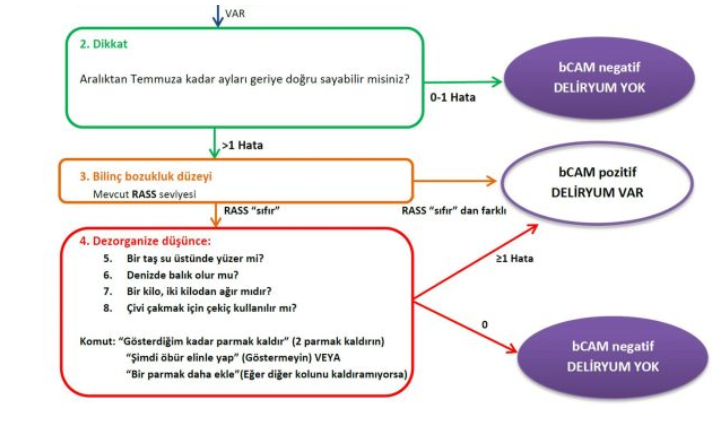

## Gerekli Kütüphanelerin Eklenmesi

In [ ]:
pip install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in /usr/local/lib/python3.6/dist-packages (0.4.2)


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Bulanık Mantık İçin Kullanılacak Olan Girdi Ve Çıktıların Belirlenmesi

In [ ]:
dikkat_degeri       = ctrl.Antecedent(np.arange(0,7,1),'dikkat_degeri')
bilinc_bozukluk     = ctrl.Antecedent(np.arange(0,2,1),'bilinc_bozukluk')
dezorganize_dusunce = ctrl.Antecedent(np.arange(0,5,1),'dezorganize_dusunce')
deliryum            = ctrl.Consequent(np.arange(0,10,1),'deliryum')

## Girişler İçin Üyelik Fonksiyonlarının Belirlenmesi

In [ ]:
dikkat_degeri.automf(3)
bilinc_bozukluk.automf(3)
dezorganize_dusunce.automf(3)

## Çıkışlar İçin Üyelik Fonksiyonlarının Belirlenmesi


In [ ]:
deliryum['yok'] = fuzz.trimf(deliryum.universe, [0,0,5])
deliryum['orta'] = fuzz.trimf(deliryum.universe, [0,5,10])
deliryum['var'] = fuzz.trimf(deliryum.universe, [5,10,10])

## Üyeliklerin Görselleştirilmesi

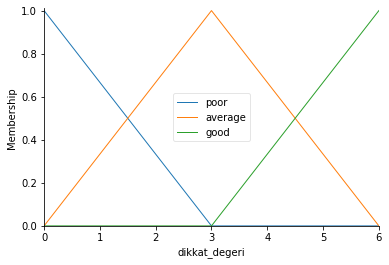

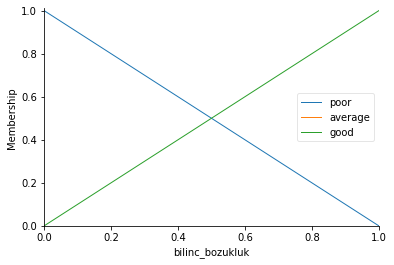

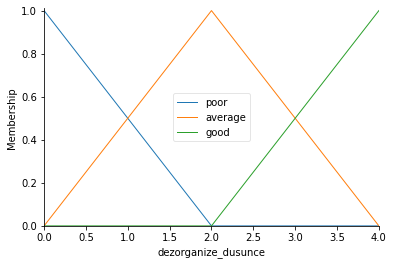

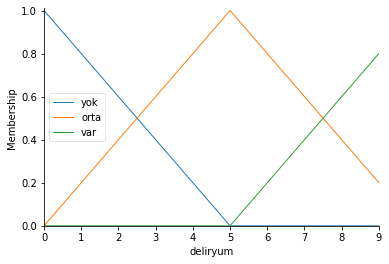

In [ ]:
dikkat_degeri.view()
bilinc_bozukluk.view()
dezorganize_dusunce.view()
deliryum.view()

## Bulanık Kuralların Belirlenmesi

In [ ]:
kural1 = ctrl.Rule(dikkat_degeri["poor"], deliryum["yok"])
kural2 = ctrl.Rule(dikkat_degeri["average"], deliryum["orta"])
kural3 = ctrl.Rule(dikkat_degeri["good"], deliryum["orta"])

kural4 = ctrl.Rule(dikkat_degeri["average"] & bilinc_bozukluk["poor"], deliryum["orta"])
kural5 = ctrl.Rule(dikkat_degeri["average"] & bilinc_bozukluk["average"], deliryum["var"])
kural6 = ctrl.Rule(dikkat_degeri["average"] & bilinc_bozukluk["good"], deliryum["var"])
kural7 = ctrl.Rule(dikkat_degeri["good"] & bilinc_bozukluk["poor"], deliryum["orta"])
kural8 = ctrl.Rule(dikkat_degeri["good"] & bilinc_bozukluk["average"], deliryum["var"])
kural9 = ctrl.Rule(dikkat_degeri["good"] & bilinc_bozukluk["good"], deliryum["var"])

kural10 = ctrl.Rule(bilinc_bozukluk["poor"] & dezorganize_dusunce["poor"], deliryum["yok"])
kural11 = ctrl.Rule(bilinc_bozukluk["poor"] & dezorganize_dusunce["average"], deliryum["var"])
kural12 = ctrl.Rule(bilinc_bozukluk["poor"] & dezorganize_dusunce["good"], deliryum["var"])

#kural12.view()

## Kontrol Mekanizmasının Belirlenmesi

In [ ]:
deliryum_kontrol = ctrl.ControlSystem([kural1, kural2, kural3, kural4, kural5, kural6, kural7, kural8, kural9, kural10, kural11, kural12])
deliryum_belirleme = ctrl.ControlSystemSimulation(deliryum_kontrol)

## Deliryum Belirleme Aşaması

In [ ]:
#gerekli parametreler ile deliryum seviyesini belirliyoruz
print(deliryum_belirleme.print_state)
deliryum_belirleme.input['dikkat_degeri'] = 0
deliryum_belirleme.input['bilinc_bozukluk'] = 0
deliryum_belirleme.input['dezorganize_dusunce'] = 0
deliryum_belirleme.compute()

<bound method ControlSystemSimulation.print_state of <skfuzzy.control.controlsystem.ControlSystemSimulation object at 0x7fe5e0d9e4a8>>


1.6666666666666665


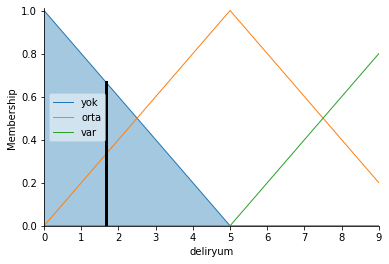

In [ ]:
print(deliryum_belirleme.output["deliryum"])
deliryum.view(sim = deliryum_belirleme)

# Yoğun Bakım Hastaları için Deliryum Belirleme

### Şekil 2 : Yoğun Bakım Hastaları İçin Deliryum Seviyesi Testi

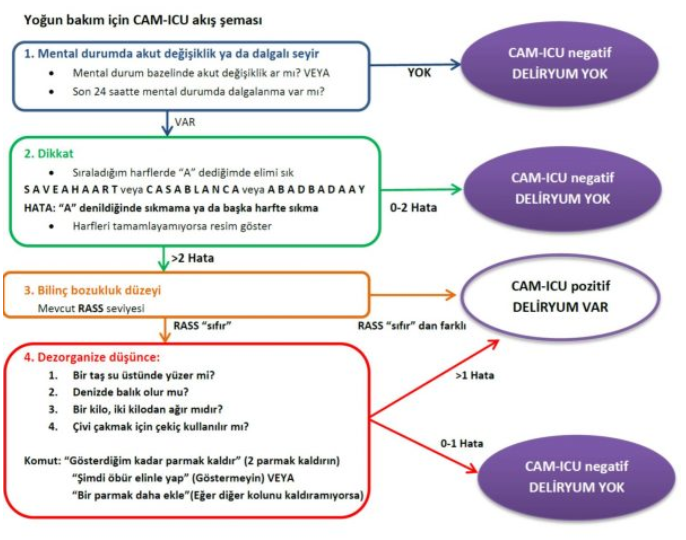

## Gerekli Kütüphanelerin Kurulması

In [ ]:
pip install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in /usr/local/lib/python3.6/dist-packages (0.4.2)


## Gerekli Kütüphanelerin Dahil Edilmesi

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Bulanık Mantık İçin Kullanılacak Olan Girdi Ve Çıktıların Belirlenmesi

In [ ]:
mental_durum        = ctrl.Antecedent(np.arange(0,2,1),'mental_durum')
dikkat_durumu       = ctrl.Antecedent(np.arange(0,11,1),'dikkat_durumu')
bilinc_bozukluk     = ctrl.Antecedent(np.arange(0,2,1),'bilinc_bozukluk')
dezorganize_dusunce = ctrl.Antecedent(np.arange(0,5,1),'dezorganize_dusunce')
deliryum            = ctrl.Consequent(np.arange(0,10,1),'deliryum')

## Girişler İçin Üyelik Fonksiyonlarının Belirlenmesi

In [ ]:
mental_durum.automf(3)
dikkat_durumu.automf(3)
bilinc_bozukluk.automf(3)
dezorganize_dusunce.automf(3)

## Çıkışlar İçin Üyelik Fonksiyonlarının Belirlenmesi

In [ ]:
deliryum['yok'] = fuzz.trimf(deliryum.universe, [0,0,5])
deliryum['orta'] = fuzz.trimf(deliryum.universe, [0,5,10])
deliryum['var'] = fuzz.trimf(deliryum.universe, [5,10,10])

## Üyelik Fanksiyonlarının Görselleştirilmesi

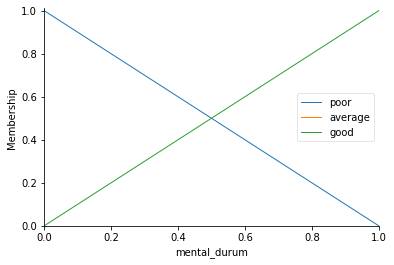

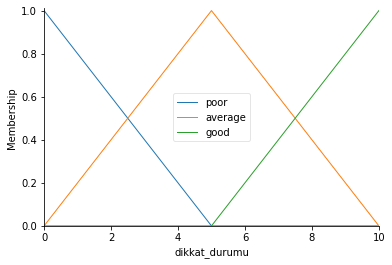

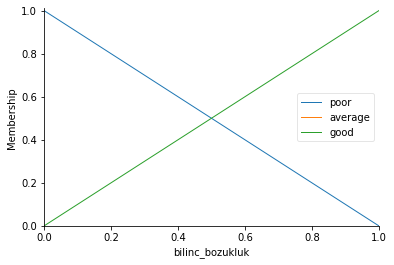

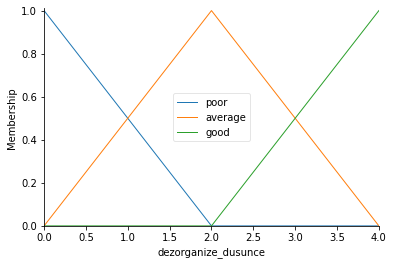

In [ ]:
mental_durum.view()
dikkat_durumu.view()
bilinc_bozukluk.view()
dezorganize_dusunce.view()

## Bulanık Kuralların Belirlenmesi

In [ ]:
kural1 = ctrl.Rule(mental_durum["poor"], deliryum["yok"])
kural2 = ctrl.Rule(mental_durum["average"] | mental_durum["good"], deliryum["orta"])

kural3 = ctrl.Rule(mental_durum["average"] & dikkat_degeri["average"], deliryum["yok"])
kural4 = ctrl.Rule(mental_durum["average"] & dikkat_degeri["poor"], deliryum["yok"])
kural4 = ctrl.Rule(mental_durum["average"] & dikkat_degeri["good"], deliryum["orta"])
kural5 = ctrl.Rule(mental_durum["good"] & dikkat_degeri["poor"], deliryum["yok"])
kural6 = ctrl.Rule(mental_durum["good"] & dikkat_degeri["average"], deliryum["yok"])
kural7 = ctrl.Rule(mental_durum["good"] & dikkat_degeri["good"], deliryum["orta"])

kural8 = ctrl.Rule(dikkat_degeri["poor"] | dikkat_degeri["average"], deliryum["yok"])
kural9 = ctrl.Rule(dikkat_degeri["good"] & bilinc_bozukluk["average"], deliryum["var"])
kural10 = ctrl.Rule(dikkat_degeri["good"] & bilinc_bozukluk["good"], deliryum["var"])
kural11 = ctrl.Rule(dikkat_degeri["good"] & bilinc_bozukluk["poor"], deliryum["orta"])

kural12 = ctrl.Rule(bilinc_bozukluk["good"] | bilinc_bozukluk["average"], deliryum["var"])
kural13 = ctrl.Rule(bilinc_bozukluk["poor"] & dezorganize_dusunce["average"], deliryum["var"])
kural14 = ctrl.Rule(bilinc_bozukluk["poor"] & dezorganize_dusunce["good"], deliryum["var"])
kural15 = ctrl.Rule(bilinc_bozukluk["poor"] & dezorganize_dusunce["poor"], deliryum["yok"])

kural16 = ctrl.Rule(dezorganize_dusunce["average"] | dezorganize_dusunce["good"], deliryum["var"])
kural17 = ctrl.Rule(dezorganize_dusunce["poor"],deliryum["yok"])

## Kontrol Mekanizmasının Belirlenmesi

In [ ]:
deliryum_kontrol = ctrl.ControlSystem([kural1, kural2, kural3, kural4, kural5, kural6, kural7, kural8, kural9, kural10, kural11, kural12, kural13, kural14, kural15, kural16, kural17])
deliryum_belirleme = ctrl.ControlSystemSimulation(deliryum_kontrol)

## Deliryum Belirleme Aşaması

In [ ]:
#gerekli parametreler ile deliryum seviyesini belirliyoruz
print(deliryum_belirleme.print_state)
deliryum_belirleme.input["mental_durum"] = 1
deliryum_belirleme.input['dikkat_degeri'] = 10
deliryum_belirleme.input['bilinc_bozukluk'] = 1
deliryum_belirleme.input['dezorganize_dusunce'] = 4
deliryum_belirleme.compute()

<bound method ControlSystemSimulation.print_state of <skfuzzy.control.controlsystem.ControlSystemSimulation object at 0x7fe5e0b006d8>>


5.234567901234567


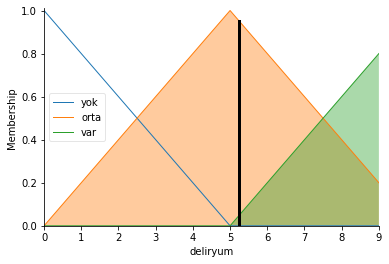

In [ ]:
print(deliryum_belirleme.output["deliryum"])
deliryum.view(sim = deliryum_belirleme)

# Deliryum Sonrası

## Şekil 3: Deliryum Sonrasında Hastalar Nasıl Takip Edilir

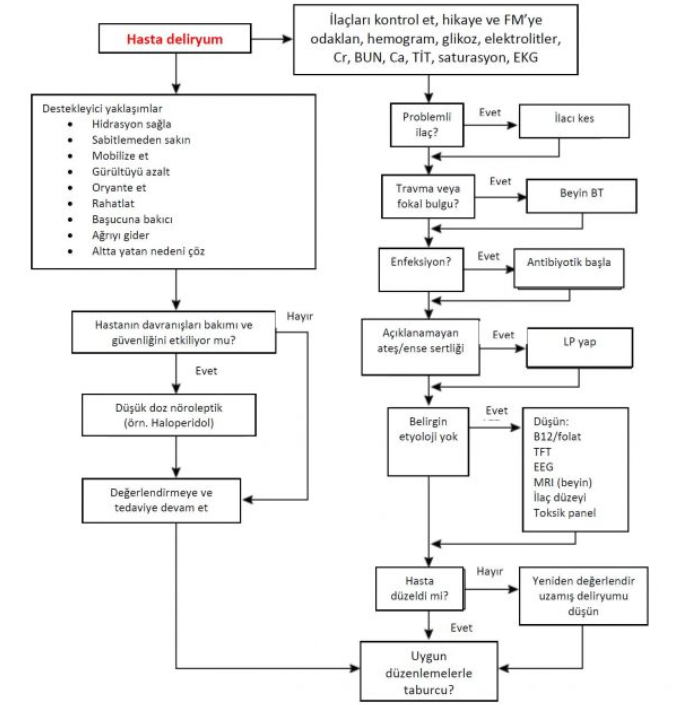